## Importing and Understanding the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [3]:
file = 'laptops.csv'

In [4]:
df = pd.read_csv(file)

In [5]:
df = pd.read_csv(file, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [6]:
headers = ["Manufacturer", "Category", "Screen", "GPU", "OS", "CPU_core", "Screen_Size_inch", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg", "Price"]
df.columns = headers
df.head(10)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
5,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016
6,HP,3,Full HD,3,1,5,39.624,1.6,8,256,2.1,1117
7,Acer,3,IPS Panel,2,1,5,38.1,1.6,4,256,2.2,866
8,Dell,3,Full HD,1,1,5,39.624,2.5,4,256,2.3,812
9,Acer,3,IPS Panel,3,1,7,38.1,1.8,8,256,2.2,1068


In [7]:
df = df.replace('?',np.nan)

In [8]:
df.dtypes

Manufacturer         object
Category              int64
Screen               object
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch     object
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_kg            object
Price                 int64
dtype: object

In [9]:
df.describe(include='all')

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238,238.000000,238,238.000000,238.000000,238.000000,234,238.000000,238.000000,238.000000,233,238.000000
unique,11,NaN,2,NaN,NaN,NaN,9,NaN,NaN,NaN,77,NaN
top,Dell,NaN,Full HD,NaN,NaN,NaN,39.624,NaN,NaN,NaN,2.2,NaN
freq,71,NaN,161,NaN,NaN,NaN,89,NaN,NaN,NaN,21,NaN
mean,NaN,3.205882,NaN,2.151261,1.058824,5.630252,NaN,2.360084,7.882353,245.781513,NaN,1462.344538
std,NaN,0.776533,NaN,0.638282,0.235790,1.241787,NaN,0.411393,2.482603,34.765316,NaN,574.607699
min,NaN,1.000000,NaN,1.000000,1.000000,3.000000,NaN,1.200000,4.000000,128.000000,NaN,527.000000
25%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,NaN,2.000000,8.000000,256.000000,NaN,1066.500000
50%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,NaN,2.500000,8.000000,256.000000,NaN,1333.000000
75%,NaN,4.000000,NaN,3.000000,1.000000,7.000000,NaN,2.700000,8.000000,256.000000,NaN,1777.000000


In [10]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


## Data wrangling

In [11]:
df = pd.read_csv('laptops_wrangling.csv', header=0)

In [12]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [13]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


### Evaluate the dataset for missing data

In [14]:
#create a df with missing values (true or false). Loop for each column print the number of missing values
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 


   Unnamed: 0  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
0       False         False     False   False  False  False     False   
1       False         False     False   False  False  False     False   
2       False         False     False   False  False  False     False   
3       False         False     False   False  False  False     False   
4       False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           False          False   False           False      False  False  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  
Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    23

### Replace with mean

In [15]:
weight_kg_mean = df['Weight_kg'].mean()
print(weight_kg_mean)

df['Weight_kg'] = df['Weight_kg'].fillna(df['Weight_kg'].mean())
df.head()

1.8622317596566522


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


### Replace with the most frequent value

In [16]:
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"] = df["Screen_Size_cm"].replace(np.nan, common_screen_size)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


### Fixing the data types

In [17]:
df.Weight_kg = df.Weight_kg.astype('float')
df.Screen_Size_cm = df.Screen_Size_cm.astype('float')

df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

### Data Standardization

In [18]:
df['Weight_kg'] = df['Weight_kg'] * 2.205
df.rename(columns={"Weight_kg": "Weight_pounds"}, inplace=True)

df['Screen_Size_cm'] = df['Screen_Size_cm'] / 2.54
df.rename(columns={"Screen_Size_cm": "Screen_Size_inch"}, inplace=True)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,4.21155,837


### Data Normalization


In [19]:
#Simple Featue Scaling
df['CPU_frequency'] = df['CPU_frequency'] / df['CPU_frequency'].max()

### Binning

In [20]:
bins = np.linspace(min(df['Price']),max(df['Price']),4)
attributes = ['Low','Medium','High']
df['Price-binned'] = pd.cut(df['Price'],bins,labels=attributes, include_lowest=True)

Text(0.5, 1.0, 'Price bins')

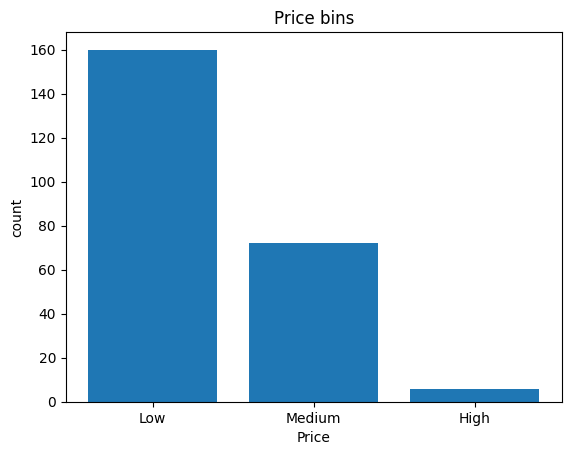

In [21]:
plt.bar(attributes, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

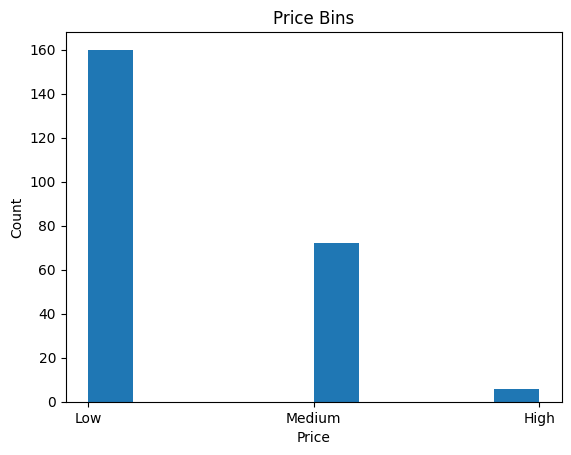

In [22]:
plt.hist(df['Price-binned'], histtype='bar', rwidth=50)  # Histogram for price-binned

# Adding titles and labels
plt.title('Price Bins')  # Title of the plot
plt.xlabel('Price')  # X-axis label
plt.ylabel('Count')  # Y-axis label

# Show the plot
plt.show()

In [23]:
# Write your code below and press Shift+Enter to execute

#we create the categories with pandas dummies
dummy_screen = pd.get_dummies(df['Screen'])

#we rename the categorie columns directly in the dataframe
df.rename(columns={'Screen-IPS_panel':'Screen-IPS_panel','Screeb-Full_HD':'Screen-Full_HD'},inplace=True)

#we add the columns in the dataframe
df = pd.concat([df,dummy_screen],axis=1)

#we remove the screen column
df.drop("Screen",axis=1,inplace=True)

In [24]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Full HD,IPS Panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False


# Exploratory Data Analysis

In [25]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Full HD,IPS Panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False


Check the correlation between some features and price to check if there is a weak or strong relationship

<Axes: xlabel='CPU_frequency', ylabel='Price'>

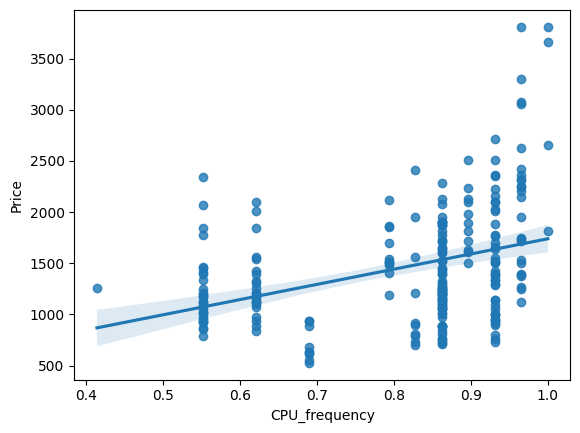

In [26]:
sns.regplot(x='CPU_frequency', y='Price', data=df)

<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

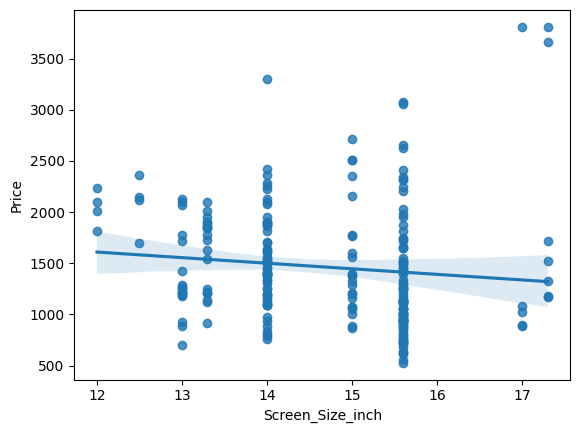

In [27]:
sns.regplot(x='Screen_Size_inch', y='Price', data=df)

<Axes: xlabel='Weight_pounds', ylabel='Price'>

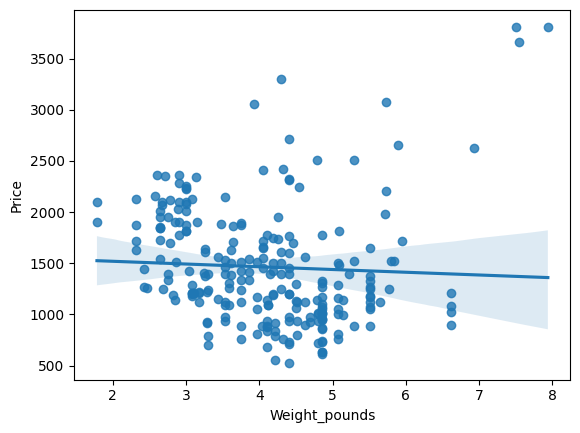

In [28]:
sns.regplot(x='Weight_pounds', y='Price', data=df)

Now we want to check the values of the three attributes with Price

In [29]:
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"{df[[param,"Price"]].corr()}\n")

               CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000

                  Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110565
Price                    -0.110565  1.000000

               Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000



Let's check the categorical features correlation with Price using boxplots

<Axes: xlabel='Category', ylabel='Price'>

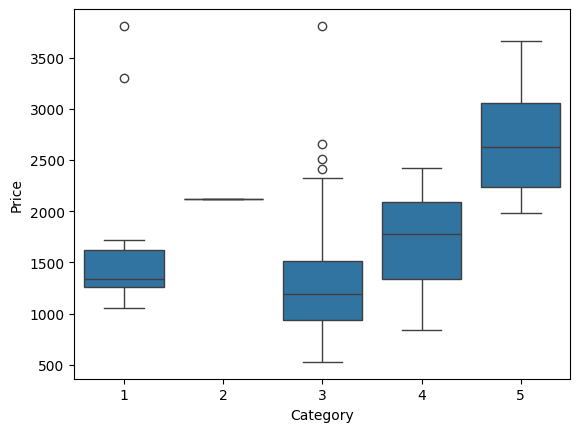

In [30]:
sns.boxplot(x="Category", y="Price", data=df)

<Axes: xlabel='GPU', ylabel='Price'>

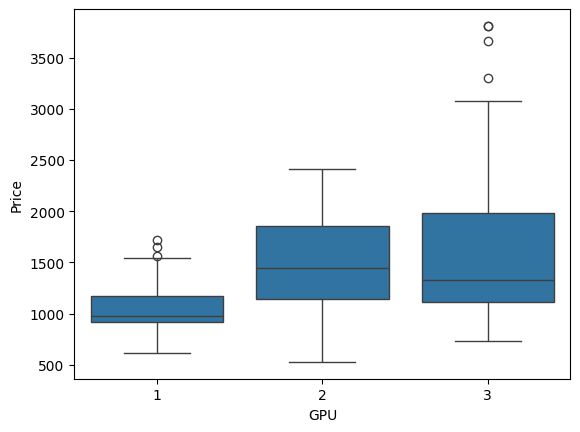

In [31]:
sns.boxplot(x="GPU", y="Price", data=df)

<Axes: xlabel='OS', ylabel='Price'>

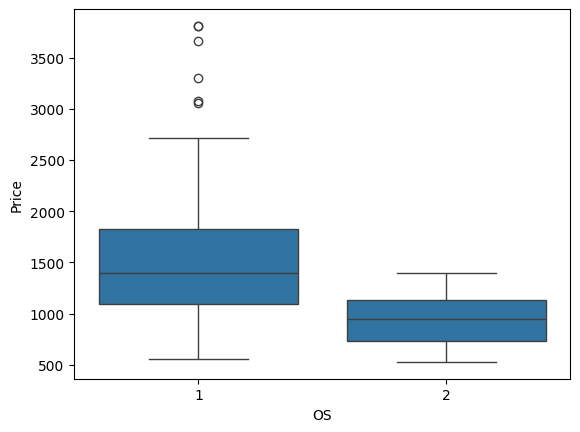

In [32]:
sns.boxplot(x="OS", y="Price", data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

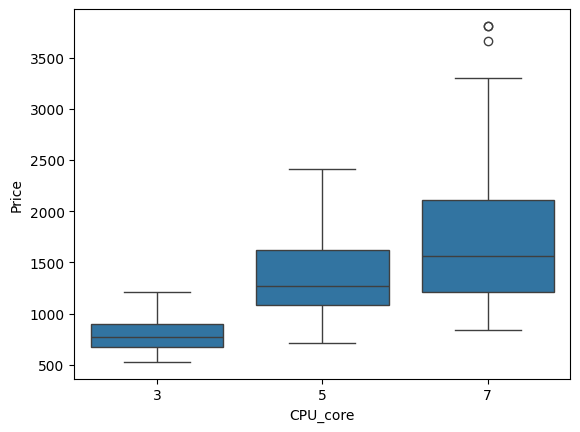

In [33]:
sns.boxplot(x="CPU_core", y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

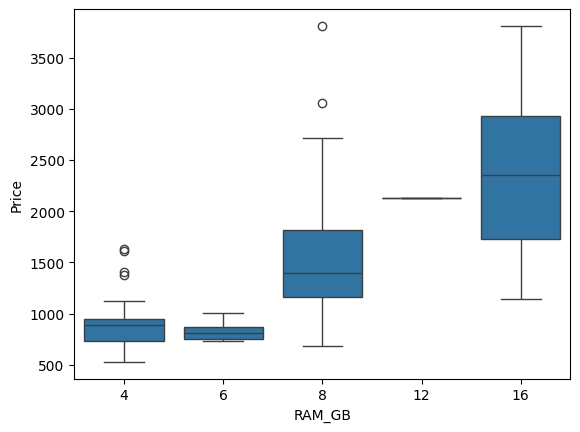

In [34]:
sns.boxplot(x="RAM_GB", y="Price", data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

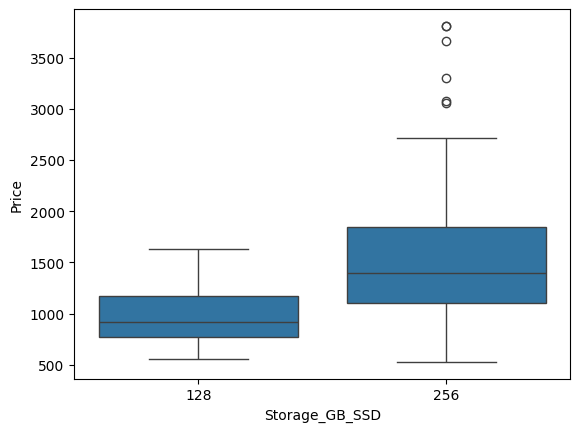

In [35]:
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

In [36]:
df['Price-binned'] = df['Price-binned'].astype('object')

In [37]:
df.describe(include='object')

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


Now we are gonna group the parameters "GPU", "CPU-core" and Price to visualize the connection using a pcolor plot

In [38]:
df_pivot_group = df[['GPU','CPU_core','Price']]
df_grp = df_pivot_group.groupby(['GPU','CPU_core'], as_index=False).mean()
df_grp

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [39]:
#creating the pivot table

df_pivot = df_grp.pivot(index='GPU',columns='CPU_core')
df_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

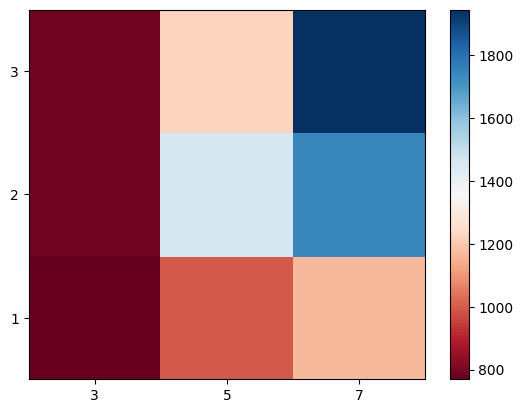

In [40]:
fig, ax = plt.subplots()
im = ax.pcolor(df_pivot, cmap='RdBu')

#label names
row_labels = df_pivot.columns.levels[1]
col_labels = df_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

Now let's use Pearson Correlation and discover the coefficient and p-value for each parameters we tested to check the if there's a strong effect on the price or not

In [42]:
import pandas as pd
import scipy.stats as stats

for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(f"The Pearson Correlation Coefficient for \033[1m{param}\033[0m and 'Price' is {pearson_coef} with a P-Value of P = {p_value}\n")

The Pearson Correlation Coefficient for RAM_GB and 'Price' is 0.5492972971857841 with a P-Value of P = 3.681560628842986e-20

The Pearson Correlation Coefficient for CPU_frequency and 'Price' is 0.36666555892588604 with a P-Value of P = 5.5024633507134316e-09

The Pearson Correlation Coefficient for Storage_GB_SSD and 'Price' is 0.24342075521810297 with a P-Value of P = 0.00014898923191724212

The Pearson Correlation Coefficient for Screen_Size_inch and 'Price' is -0.1105647127542506 with a P-Value of P = 0.08876456732700777

The Pearson Correlation Coefficient for Weight_pounds and 'Price' is -0.05031225837751551 with a P-Value of P = 0.43976938534338944

The Pearson Correlation Coefficient for CPU_core and 'Price' is 0.4593977773355117 with a P-Value of P = 7.912950127009089e-14

The Pearson Correlation Coefficient for OS and 'Price' is -0.22172980114827395 with a P-Value of P = 0.0005696642559246697

The Pearson Correlation Coefficient for GPU and 'Price' is 0.2882981988881427 with 

# Model Development

In [ ]:
df.head(25)

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Full HD,IPS Panel
0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
5,5,Dell,3,1,1,5,15.6,0.551724,8,256,4.85100,1016,Low,1,0
6,6,HP,3,3,1,5,15.6,0.551724,8,256,4.63050,1117,Low,1,0
7,7,Acer,3,2,1,5,15.0,0.551724,4,256,4.85100,866,Low,0,1
8,8,Dell,3,1,1,5,15.6,0.862069,4,256,5.07150,812,Low,1,0
9,9,Acer,3,3,1,7,15.0,0.620690,8,256,4.85100,1068,Low,0,1


In [ ]:
from scipy.stats import pearsonr

pearson_coef, p_value = stats.pearsonr(df['CPU_frequency'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.36666555892588604  with a P-value of P =  5.502463350713339e-09


You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.

In [46]:
lm = LinearRegression()

X = df[['CPU_frequency']]
Y = df[['Price']]

lm.fit(X,Y)

Yhat = lm.predict(X)

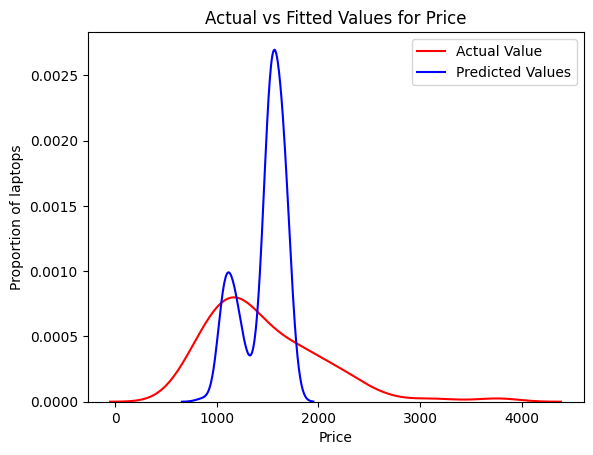

In [47]:
ax1 = sns.distplot(df['Price'], hist=False, color='r', label='Actual Value')
sns. distplot(Yhat, hist=False, color='b', label='Fitted Values', ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value','Predicted Values'])

Mean Squared Error and R^2 score values

In [48]:
# Write your code below and press Shift+Enter to execute 
mse = mean_squared_error(df['Price'],Yhat)
r2 = lm.score(X,Y)
print('The R-square for Linear Regression is: ', r2)
print('The mean square error of price and predicted value is: ', mse)

The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


In [49]:
lm1 = LinearRegression()
Z = df[[ 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
lm1.fit(Z,Y)
Y_hat_mlr = lm1.predict(Z)

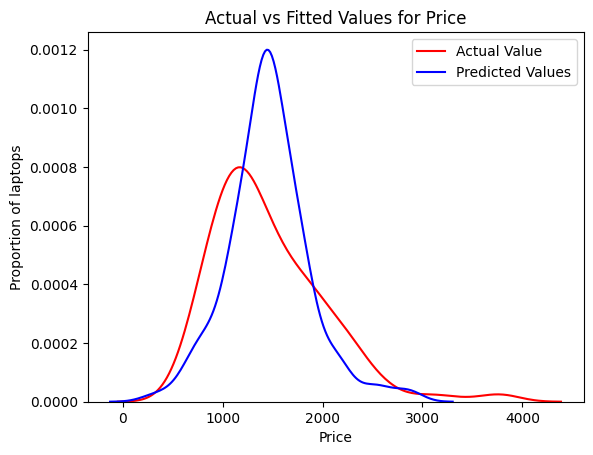

In [50]:
ax2 = sns.distplot(df['Price'], hist=False, color='r', label='Actual Value')
sns. distplot(Y_hat_mlr, hist=False, color='b', label='Fitted Values', ax=ax2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value','Predicted Values'])

In [51]:
mse_mlr = mean_squared_error(df['Price'],Y_hat_mlr)
r2_mlr = lm1.score(Z,Y)
print('The R-square for Linear Regression is: ', r2_mlr)
print('The mean square error of price and predicted value is: ', mse_mlr)

The R-square for Linear Regression is:  0.5082509055187374
The mean square error of price and predicted value is:  161680.57263893107


### Polynomial Regression

In [54]:
X = X.to_numpy().flatten()
Y = Y.to_numpy().flatten()


f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f2 = np.polyfit(X, Y, 2)
p2 = np.poly1d(f2)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 7)
p5 = np.poly1d(f5)

In [55]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

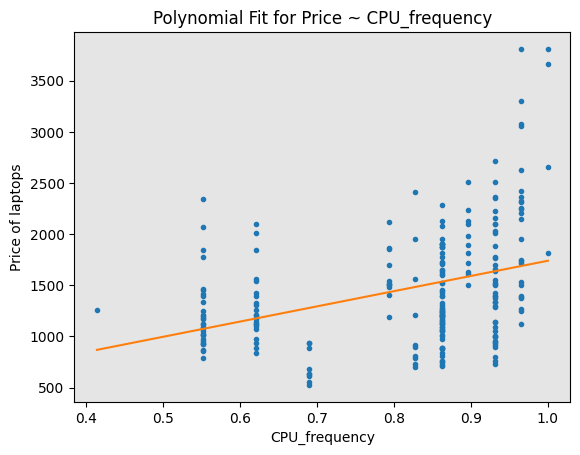

In [56]:
# Call for function of degree 1
PlotPolly(p1, X, Y, 'CPU_frequency')

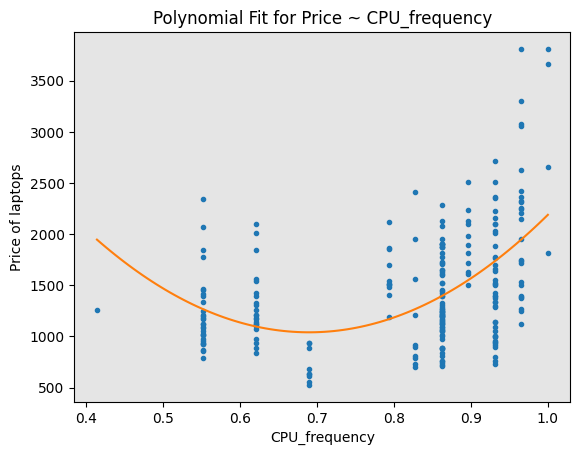

In [57]:
# Call for function of degree 3
PlotPolly(p2, X, Y, 'CPU_frequency')

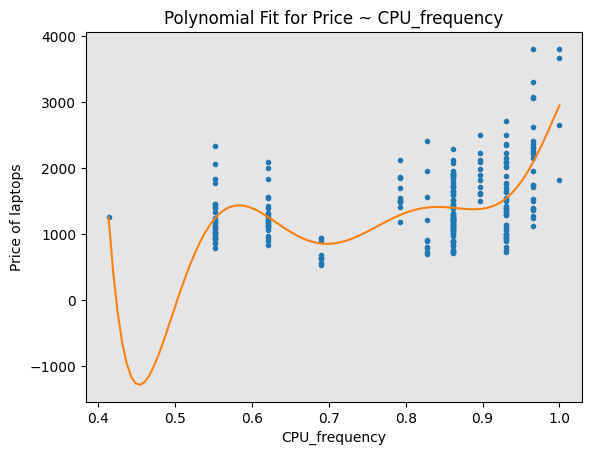

In [58]:
# Call for function of degree 5
PlotPolly(p5, X, Y, 'CPU_frequency')

In [59]:
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is:', r_squared_1)

r_squared_1 = r2_score(Y, p2(X))
print('The R-square value for 1st degree polynomial is:', r_squared_1)

r_squared_1 = r2_score(Y, p3(X))
print('The R-square value for 1st degree polynomial is:', r_squared_1)

r_squared_1 = r2_score(Y, p5(X))
print('The R-square value for 1st degree polynomial is:', r_squared_1)

The R-square value for 1st degree polynomial is: 0.1344436321024326
The R-square value for 1st degree polynomial is: 0.24260120745423763
The R-square value for 1st degree polynomial is: 0.26692640796531075
The R-square value for 1st degree polynomial is: 0.32518821585852764


## Pipeline

Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline. 

In [60]:
Input = [('scale',StandardScaler()), ('polynomial',PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)

In [61]:
mse_pipe = mean_squared_error(Y,ypipe)
r2_pipe = r2_score(Y,ypipe)

print('MSE for multi-variable polynomial pipeline is: ', mse_pipe)
print('R^2 for multi-variable polynomial pipeline is: ', r2_pipe)

MSE for multi-variable polynomial pipeline is:  124771.2268907563
R^2 for multi-variable polynomial pipeline is:  0.6205101402141396


<Axes: xlabel='Price', ylabel='Density'>

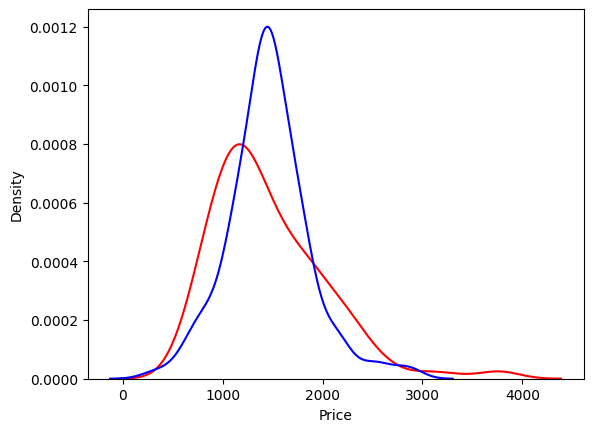

In [62]:
import seaborn as sns

ax1 = sns.distplot(df['Price'], hist=False, color='r', label='Actual Value')
sns.distplot(Y_hat_mlr, hist=False, color='b', label='Fitted Values', ax=ax1)

# Model Evaluation & Refinement

In [69]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [63]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Full HD,IPS Panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False


In [64]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [65]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Full HD,IPS Panel
0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False


### Using Cross Validation to Improve the Model

In [66]:
X_data = df.drop('Price', axis=1) #dataframe (2 dimensions)
y_data = df['Price'] #series (1 dimension)
y_data

0       978
1       634
2       946
3      1244
4       837
       ... 
233    1891
234    1950
235    2236
236     883
237    1499
Name: Price, Length: 238, dtype: int64

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size = 0.10,
                                                    random_state = 1)
print("number of training samples: ", X_train.shape[0])
print("number of test samples: ", X_test.shape[0])

number of training samples:  214
number of test samples:  24


single variable linear regression model using "CPU_frequency" parameter. Print the R^2 value of this model for the training and testing subsets.

In [99]:
lr_cpu_frequency = LinearRegression()
lr_cpu_frequency.fit(X_train[['CPU_frequency']], y_train)

print('Score train base:', lr_cpu_frequency.score(X_train[['CPU_frequency']], y_train))
print('Score test base:', lr_cpu_frequency.score(X_test[['CPU_frequency']], y_test))


Score train base: 0.14829792099817962
Score test base: -0.06599437350393766


4-fold cross validation on the model mean value of R^2 score along with its standard deviation.

In [101]:
Rcross = cross_val_score(lr_cpu_frequency, X_train[['CPU_frequency']], y_train, cv=4)
print(f"Mean of rcross: {Rcross.mean()} and std: {Rcross.std()}")

Mean of rcross: 0.12738818019555026 and std: 0.0831705801091202


overfitting - Spliting the data set into training and testing components again, this time reserving 50% of the data set for testing. (fixing random_state to a fixed quantity helps maintain uniformity between multiple executions of the code.)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size = 0.5,
                                                    random_state = 0)

print("number of training samples: ", X_train.shape[0])
print("number of test samples: ", X_test.shape[0])

number of training samples:  119
number of test samples:  119


To identify the point of overfitting the model on the parameter "CPU_frequency", let's create a polynomial features using the single attribute. Evaluate the R^2 scores of the model created using different degrees of polynomial features, ranging from 1 to 5.

In [103]:
lre = LinearRegression()
Rsquared_scores = []
order = [1,2,3,4,5]

for i in order:
    pr = PolynomialFeatures(degree=i)
    x_train_pr = pr.fit_transform(X_train[['CPU_frequency']])
    x_test_pr = pr.transform(X_test[['CPU_frequency']])
    lre.fit(x_train_pr, y_train)
    Rsquared_scores.append(lre.score(x_test_pr, y_test))

We can see that from order 3 it drops, meaning overfitting

Text(0.5, 1.0, 'R^2 Using Test Data')

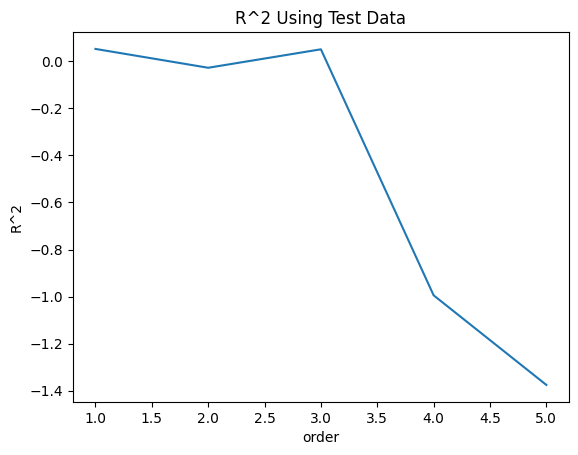

In [81]:
plt.plot(order, Rsquared_scores)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

### Ridge Regression

'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU' and 'Category'. Polynomial feature model that uses all these parameters with degree=2.

In [105]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(X_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']])
x_test_pr = pr.fit_transform(X_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']])

Ridge Regression model and evaluation of it using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001. Creation of a list of all Ridge Regression R^2 scores for training and testing data.


In [106]:
Rsquared_train = []
Rsquared_test = []
alpha_values  = np.arange(0.0001,1,0.001)
pbar = tqdm(alpha_values)

for alpha in pbar:
    RidgeModel = Ridge(alpha=alpha)
    RidgeModel.fit(x_train_pr, y_train)
    test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsquared_test.append(test_score)
    Rsquared_train.append(train_score)

100%|██████████| 1000/1000 [00:03<00:00, 311.51it/s, Test Score=0.423, Train Score=0.669]


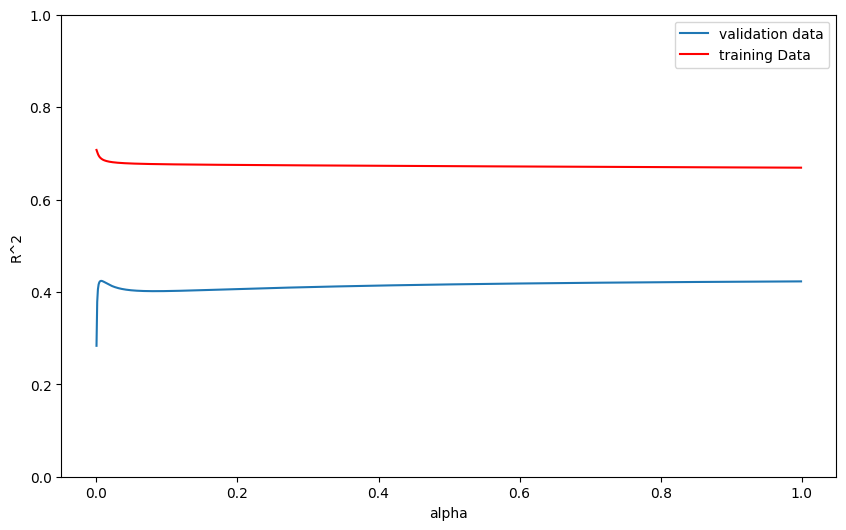

In [107]:
plt.figure(figsize=(10, 6))  
plt.plot(alpha_values, Rsquared_test, label='validation data')
plt.plot(alpha_values, Rsquared_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

In [89]:
alpha_values = [{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]

RR = Ridge()

Grid1 = GridSearchCV(RR, alpha_values, cv=4)

Grid1.fit(X_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_train)

BestRR = Grid1.best_estimator_
print(BestRR.score(X_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test))

0.3009905048691819
